# Options Trading Strategy Backtesting Analysis

This notebook analyzes option trading opportunities based on probability predictions and distance from at-the-money (ATM) strikes. 

## Overview
- **Data Source**: Option model results with probability predictions
- **Strategy**: Trade options when probability exceeds statistical thresholds
- **Risk Management**: Fixed risk per trade ($5,000)
- **Analysis Period**: Multi-year backtesting with year-over-year comparison

## Key Metrics
- **Distance from ATM**: Measured in percentage terms 
- **Probability Threshold**: Mean + 1 standard deviation per distance bucket
- **Return Calculation**: Entry at close vs exit at 15:30 next day
- **Portfolio Management**: $100,000 starting capital, position sizing based on risk

In [1]:
# Import required libraries for data analysis
import pandas as pd

In [2]:
# Load the option model results CSV file
# This contains historical option data with probability predictions
df = pd.read_csv('/home/mrmath/Downloads/vwap_model_/option_model/option_model_results.csv')
df

,level_0,index,option,timestamp,open,high,low,close,volume,datetime,...,seconds_since_open,seconds_until_close,option_ret_from_open,year,pct_gain_15_30,side_aware_dist_from_ATM,side_int,prediction,probability,train_years
0,282685,282763,O:SPY230103C00376000,1672763400000,3.98,3.98,3.98,3.98,10,2023-01-03 11:30:00-05:00,...,7200.0,16200.0,0.0,2023,0.233668,-0.007916,1,0,0.437590,[np.int32(2022)]
1,282686,282764,O:SPY230103C00376000,1672763700000,3.69,3.91,3.69,3.89,5,2023-01-03 11:35:00-05:00,...,7500.0,15900.0,-9.0,2023,0.262211,-0.007916,1,1,0.511087,[np.int32(2022)]
2,282687,282765,O:SPY230103C00376000,1672764000000,3.79,3.79,3.60,3.60,6,2023-01-03 11:40:00-05:00,...,7800.0,15600.0,-38.0,2023,0.363889,-0.007916,1,0,0.437855,[np.int32(2022)]
3,282688,282766,O:SPY230103C00376000,1672764300000,3.23,3.28,3.15,3.28,81,2023-01-03 11:45:00-05:00,...,8100.0,15300.0,-70.0,2023,0.496951,-0.007916,1,0,0.341453,[np.int32(2022)]
4,282689,282767,O:SPY230103C00376000,1672764600000,3.00,3.36,3.00,3.15,113,2023-01-03 11:50:00-05:00,...,8400.0,15000.0,-83.0,2023,0.558730,-0.005291,1,0,0.387210,[np.int32(2022)]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543138,1264021,1264408,O:SPY240806C00520000,1722972600000,6.39,6.93,6.30,6.62,86,2024-08-06 15:30:00-04:00,...,21600.0,1800.0,213.0,2024,0.000000,-0.011407,1,0,0.001249,"[np.int32(2022), np.int32(2023)]"
543139,1264051,1264130,O:SPY240806C00521000,1722958200000,3.23,3.86,3.10,3.69,448,2024-08-06 11:30:00-04:00,...,7200.0,16200.0,0.0,2024,0.542005,-0.003824,1,0,0.382347,"[np.int32(2022), np.int32(2023)]"
543140,1264052,1264131,O:SPY240806C00521000,1722958500000,4.00,4.17,3.59,3.92,558,2024-08-06 11:35:00-04:00,...,7500.0,15900.0,23.0,2024,0.451531,-0.003824,1,0,0.385325,"[np.int32(2022), np.int32(2023)]"
543141,1264053,1264132,O:SPY240806C00521000,1722958800000,3.91,4.22,3.70,4.03,330,2024-08-06 11:40:00-04:00,...,7800.0,15600.0,34.0,2024,0.411911,-0.005725,1,0,0.398009,"[np.int32(2022), np.int32(2023)]"


In [3]:
# Examine the available columns in our dataset
df.columns

Index(['level_0', 'index', 'option', 'timestamp', 'open', 'high', 'low',
       'close', 'volume', 'datetime', 'close_spy', 'ATM_strike',
       'strike_price', 'dist_from_ATM', 'close_in_cents', 'pos_in_day_range',
       'close_5m_ago', 'price_change_5m', 'rolling_min_5m', 'rolling_max_5m',
       'rolling_std_5m', 'pos_in_rolling_range_5m',
       'directional_rolling_std_5m', 'close_10m_ago', 'price_change_10m',
       'rolling_min_10m', 'rolling_max_10m', 'rolling_std_10m',
       'pos_in_rolling_range_10m', 'directional_rolling_std_10m',
       'close_15m_ago', 'price_change_15m', 'rolling_min_15m',
       'rolling_max_15m', 'rolling_std_15m', 'pos_in_rolling_range_15m',
       'directional_rolling_std_15m', 'close_30m_ago', 'price_change_30m',
       'rolling_min_30m', 'rolling_max_30m', 'rolling_std_30m',
       'pos_in_rolling_range_30m', 'directional_rolling_std_30m',
       'close_60m_ago', 'price_change_60m', 'rolling_min_60m',
       'rolling_max_60m', 'rolling_std_60m', '

In [4]:
# Convert side-aware distance from ATM to percentage terms
# This makes it easier to interpret how far out-of-the-money each option is
df['dist_atm_pct'] = df['side_aware_dist_from_ATM'] * 100

In [73]:
# Display the new distance percentage alongside option prices
# This helps us understand the relationship between strike distance and option cost
df[['dist_atm_pct', 'close_in_cents']]

,dist_atm_pct,close_in_cents
0,-0.791557,398.0
977,-0.791557,289.0
40,-0.527704,263.0
732,0.527704,38.0
1219,-2.902375,1052.0
...,...,...
543138,-1.140684,662.0
543053,-1.520913,830.0
542977,-1.901141,1030.0
542935,-2.281369,1257.0


In [101]:
import numpy as np
import pandas as pd

df = df.copy()

# STEP 1: Create rounded distance buckets for statistical analysis
# Round to nearest 0.5% and clip extreme values to avoid sparse data
df["dist_otm_pct_rounded"] = ((df["dist_atm_pct"] * 2).round() / 2).clip(lower=-3, upper=3)

# STEP 2: Ensure consistent sorting before grouping
df = df.sort_values(["dist_otm_pct_rounded", "datetime"])  # Sort by bucket and datetime

# Group by rounded distance to compute mean and standard deviation of probabilities
grouped = df.groupby("dist_otm_pct_rounded")["probability"]

df["mean_prob"] = grouped.expanding().mean().reset_index(level=0, drop=True)
df["std_prob"]  = grouped.expanding().std().reset_index(level=0, drop=True)

# STEP 3: Define probability threshold for trade entry
# Only trade when probability exceeds mean + 1 standard deviation for that distance bucket
threshold = df["mean_prob"] + 1 * df["std_prob"]

# STEP 4: Apply trading filters
mask = (
    (df["year"] != 2022) &  # Exclude 2022 data (possibly for out-of-sample testing)
    (df["probability"] > threshold)  # Only high-probability opportunities
)

# STEP 5: Calculate returns (entry at close vs exit at 15:30 next day)
# This simulates buying at close and selling at 3:30 PM the following day
df["ret"] = (df["price_at_15_30"] - df["close_in_cents"]) / df["close_in_cents"]

# STEP 6: Create filtered dataset with only qualifying trades
ret_df = df.loc[mask, :].copy()

In [102]:
# Calculate the average return across all qualifying trades
# This gives us the basic profitability of our strategy
ret_df['ret'].mean()

np.float64(0.016828988996837973)

In [103]:
# Convert datetime to proper timezone (UTC to Eastern Time)
# This ensures we're working with market hours correctly
ret_df['datetime'] = pd.to_datetime(ret_df['datetime'], utc=True).dt.tz_convert('America/New_York')

In [104]:
# Examine the 'side' column to understand call vs put distribution
# This helps us understand our option types (calls vs puts)
ret_df['side']

1218       put
3957      call
3967      call
3990      call
3968      call
          ... 
542457     put
542500     put
542523     put
542479     put
542501     put
Name: side, Length: 53158, dtype: object

In [120]:
ret_df = ret_df.sort_values(
    ['dist_otm_pct_rounded', 'side', 'datetime']
)

# Extract trading date
ret_df['date'] = ret_df['datetime'].dt.date

# Keep first trade per (OTM, Call/Put, Day)
filtered = (
    ret_df
    .groupby(['dist_otm_pct_rounded', 'side', 'date'])
    .first()
    .reset_index()
)

# Rebuild dictionary
otm_ret = dict(tuple(
    filtered.groupby('dist_otm_pct_rounded')
))


In [ ]:
summary = []
equity_curves = {}
for dist, g in otm_ret.items():
    
    start_capital = 100000  # $100,000 starting capital
    g = g.reset_index(drop=True)
    day_amt = None
    dates = set()
    datetimes = []
    equity_path = []
    g = g.sort_values('datetime')
    for i in range(len(g)):
        
        entry = g.loc[i, 'close_in_cents'] / 100    #convert cents to dollars
        exit_ = g.loc[i, 'price_at_15_30'] / 100    # also in cents
        date = g.loc[i, 'date']
        if entry <= 0 or exit_ <= 0:
            continue
        trade_amount = 5000
        
        # cost per contract in dollars = entry
        contracts = int(trade_amount / (entry*100))
        print(contracts)
        if contracts > 3000:
            print(f"Skipping trade at index {i} for dist {dist} due to insufficient capital for even 1 contract.")
            continue
        
        pnl = 100*contracts*(exit_ - entry)
        start_capital += pnl
        equity_path.append(start_capital)
        datetimes.append(g.loc[i, 'datetime'])
    equity_curves[dist] = pd.Series(equity_path, index=datetimes)
    summary.append({
        'dist_otm_pct_rounded': dist,
        'final_capital': start_capital,
        'total_return_pct': (start_capital - 100000) / 100000 * 100,
        'number_of_trades': len(equity_path)

    })

summary_df = pd.DataFrame(summary).sort_values("dist_otm_pct_rounded")
summary_df

4
4
3
4
4
4
3
4
4
4
4
3
4
3
3
3
3
2
4
4
3
3
4
4
4
4
4
3
3
5
4
4
5
5
4
4
4
4
4
4
4
4
4
5
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
3
4
4
4
3
5
5
6
5
5
5
4
5
4
4
4
4
4
6
6
6
6
6
6
6
5
6
5
5
5
5
5
5
5
5
5
5
5
7
5
5
6
5
6
6
5
5
5
5
6
5
5
6
6
5
6
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
6
5
6
5
5
5
5
5
5
4
5
5
4
5
5
5
5
5
5
5
5
4
5
5
5
5
5
6
5
6
5
5
5
5
4
5
4
6
5
4
4
5
5
5
5
5
4
4
5
4
4
4
4
4
6
7
7
7
7
6
6
5
7
6
6
8
8
6
6
6
6
6
5
6
6
6
5
7
5
5
6
6
5
5
5
6
5
6
6
5
5
6
6
5
6
6
7
6
5
6
7
6
5
5
5
7
9
7
7
8
9
9
8
8
8
7
7
8
6
7
6
6
6
6
7
8
6
6
6
6
9
9
7
7
8
6
7
7
7
6
6
6
7
7
7
6
6
6
7
7
7
6
6
8
6
6
6
7
6
7
7
7
7
6
6
6
7
7
7
7
8
6
7
6
8
7
6
6
7
6
6
7
6
8
8
7
8
7
8
6
7
7
6
8
6
6
6
6
6
7
6
6
7
6
6
7
7
7
6
7
6
6
6
6
6
7
7
7
8
6
7
7
8
6
6
6
7
6
7
8
8
6
6
6
6
6
7
6
6
7
5
8
6
6
5
6
8
8
7
6
6
6
6
5
6
5
6
6
5
5
6
6
6
5
6
10
10
8
7
11
8
7
9
7
8
8
9
8
9
12
10
10
8
8
10
9
9
7
10
9
8
8
7
9
9
8
7
9
7
8
9
7
9
7
10
7
8
8
9
9
9
8
7
7
9
7
7
7
8
7
7
9
7
7
8
8
8
9
8
7
8
8
8
9
9
9
9
8
7
6
7
5
7
6
7
12


,dist_otm_pct_rounded,final_capital,total_return_pct,number_of_trades
0,-3.0,103427.0,3.427,29
1,-2.5,105568.0,5.568,67
2,-2.0,105516.0,5.516,158
3,-1.5,112106.0,12.106,240
4,-1.0,93352.0,-6.648,313
5,-0.5,103763.0,3.763,400
6,0.0,142997.0,42.997,649
7,0.5,209032.0,109.032,498
8,1.0,368290.0,268.290,288
9,1.5,-149536.0,-249.536,103


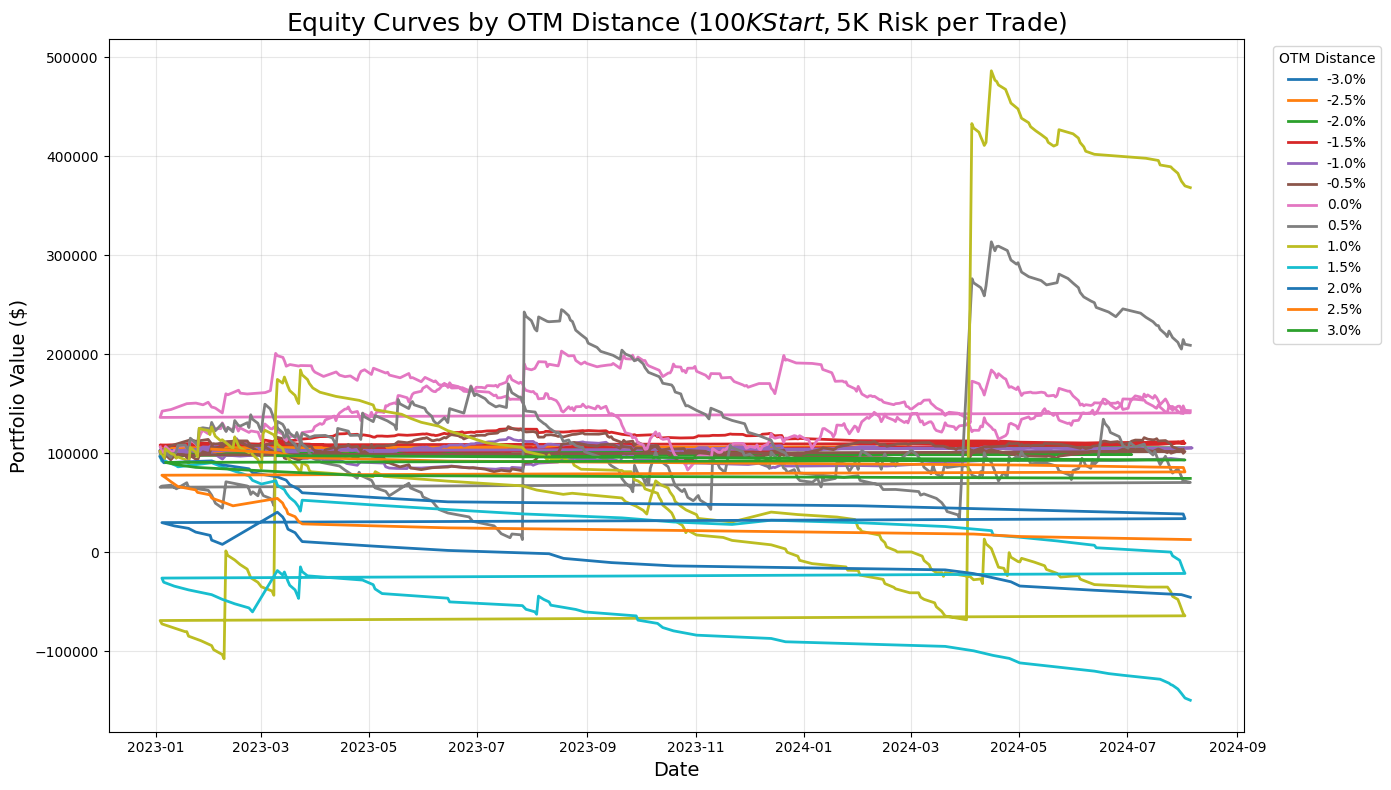

In [139]:
# ============================================================================
# EQUITY CURVE VISUALIZATION
# ============================================================================
# Create a comprehensive chart showing how each OTM strategy performs over time
# This helps visualize the risk/return profile and consistency of each approach

import matplotlib.pyplot as plt

# Create a large figure to accommodate multiple equity curves
plt.figure(figsize=(14, 8))

# Plot equity curve for each OTM distance strategy
for dist in sorted(equity_curves.keys()):
    curve = equity_curves[dist]
    
    # Skip empty equity curves (strategies with no valid trades)
    if len(curve) ==0:
        continue
        
    # Plot the equity progression over time
    plt.plot(curve.index, curve.values, linewidth=2, label=f"{dist}%")

# Format the chart for clarity and professional presentation
plt.title("Equity Curves by OTM Distance ($100K Start, $5K Risk per Trade)", fontsize=18)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Portfolio Value ($)", fontsize=14)

# Add legend showing each strategy, positioned outside the plot area
plt.legend(title="OTM Distance", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.grid(alpha=0.3)           # Light grid for easier reading
plt.tight_layout()            # Optimize layout spacing
plt.show()
